## Support Vector Machine 

* Application on Iris Data 
* Compare Linear SVM and RGB with different paramters
* Classfier Indexe Computation: accuracy, precision, $F_1$, $F_{\beta}$
* Unbalanced Data
* Hand Written Digits Recognization 
* Support Vector Regression
* SVR with Cross Validation

In [11]:
# classification of the Iris data
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt


def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

classes = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}



# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'sepal length', u'sepal width', u'petal length', u'petal width'


def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print (tip + 'Accuracy：', np.mean(acc))
# help(svm.SVC)

In [14]:

path = 'Data-and-Output/8.iris.data'  # data path

# read data 
# data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: lambda x: classes[x]})


# separate features(x) and response(y)
x, y = np.split(data, (4,), axis=1)
x = x[:, :2] # only select the first two features 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

# classifier
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')  # radial basis function , ovr: one vs. rest
clf.fit(x_train, y_train.ravel())

# accuracy
print (clf.score(x_train, y_train))  
y_hat = clf.predict(x_train)
show_accuracy(y_hat, y_train, 'Training Data')
print (clf.score(x_test, y_test))
y_hat = clf.predict(x_test)
show_accuracy(y_hat, y_test, 'Test Data')



0.866666666667
Training DataAccuracy： 0.866666666667
0.65
Test DataAccuracy： 0.65


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Distance [[-0.02248787  2.04243623  0.98005163]
 [-0.02092291  2.04165431  0.9792686 ]
 [-0.01929329  2.04084007  0.97845322]
 ..., 
 [-0.04903923  2.05568979  0.99334945]
 [-0.04903923  2.05568979  0.99334945]
 [-0.04903923  2.05568979  0.99334945]]
Predicted values [ 1.  1.  1. ...,  1.  1.  1.]


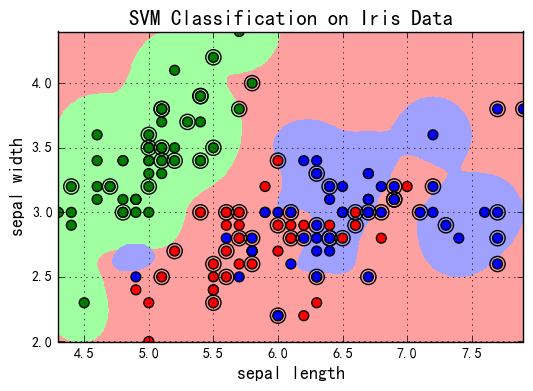

In [16]:
# plot
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # range of the first feature
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # range of the second feature
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # mesh grid
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # the values to be used for prediction

Z = clf.decision_function(grid_test)    # distance of sample to decision region
print ('Distance',Z)
grid_hat = clf.predict(grid_test)       #  predicted values at all grid points
print ('Predicted values',grid_hat)
grid_hat = grid_hat.reshape(x1.shape)  # reshape
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

# plot
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # plot samples (train and test)
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)     # only circle train samples
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'SVM Classification on Iris Data', fontsize=15)
plt.grid()
plt.show()


### Compare Linear SVM and RGB with different paramters 

In [18]:

import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt


def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    print ('Accuracy：%.2f%%' % (100*float(acc.sum()) / a.size))




In [28]:
# load data
data = np.loadtxt('Data-and-Output/14.bipartition.txt', dtype=np.float, delimiter='\t')
x, y = np.split(data, (2, ), axis=1)
y[y == 0] = -1
y = y.ravel()

# help(svm.SVC)


Accuracy：73.00%
Number of support vectors： [37 37]
Coefficient： [[-0.3        -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.29815268 -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.19648412 -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
  -0.3        -0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3         0.3
   0.24836591  0.3         0.24627088  0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3       ]]
Indices of support vectors： [ 0  1  2  4  5  6  8 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26

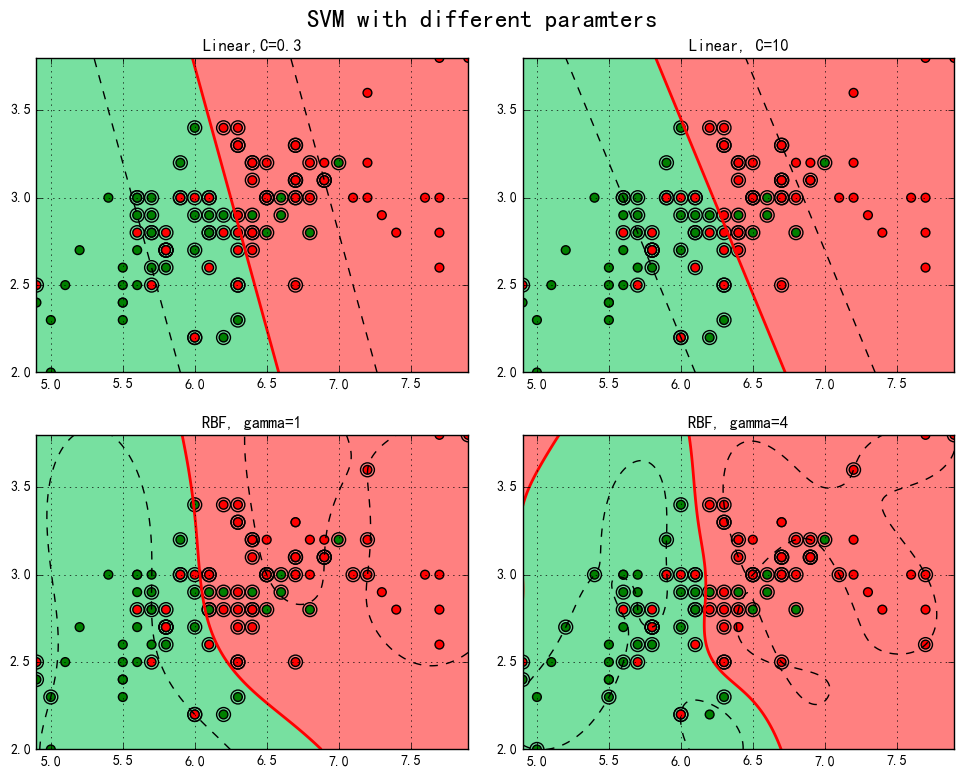

In [31]:
# classfier
# C: Penalty parameter C of the error term.
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
clfs = [svm.SVC(C=0.3, kernel='linear'),
        svm.SVC(C=10, kernel='linear'),
        svm.SVC(C=5, kernel='rbf', gamma=1),
        svm.SVC(C=5, kernel='rbf', gamma=4)]
titles = 'Linear,C=0.3', 'Linear, C=10', 'RBF, gamma=1', 'RBF, gamma=4'

x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # range of the first feature
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # range of the second feature
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # mesh grid
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # test points

cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,8), facecolor='w')


for i, clf in enumerate(clfs):
    clf.fit(x, y)

    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)  # show accuracy 

#plot 
    print ('Number of support vectors：', clf.n_support_)  # Number of support vectors for each class.
    print ('Coefficient：', clf.dual_coef_) # Coefficients of the support vector in the decision function.

    print ('Indices of support vectors：', clf.support_)
    print
    plt.subplot(2, 2, i+1)
    grid_hat = clf.predict(grid_test)       # prediction
    grid_hat = grid_hat.reshape(x1.shape)  # reshape
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)      # show sample
    plt.scatter(x[clf.support_, 0], x[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   
    z = clf.decision_function(grid_test)
    z = z.reshape(x1.shape)
    print("z", z, "\n")

    plt.contour(x1, x2, z, colors=list('krk'), linestyles=['--', '-', '--'], linewidths=[1, 2, 1], levels=[-1, 0, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(titles[i])
    plt.grid()
plt.suptitle(u'SVM with different paramters', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()

### Classfier Indexe Computation: accuracy, precision, $F_1$, $F_{\beta}$

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score # compute scores
from sklearn.metrics import precision_recall_fscore_support

In [33]:
y_true = np.array([1, 1, 1, 1, 0, 0])
y_hat = np.array([1, 0, 1, 1, 1, 1])
print ('Accuracy：\t', accuracy_score(y_true, y_hat))

Accuracy：	 0.5


In [34]:
# The precision is the ratio 'tp / (tp + fp)' where 'tp' is the number of
# true positives and 'fp' the number of false positives. The precision is
# intuitively the ability of the classifier not to label as positive a sample
# that is negative.
# The best value is 1 and the worst value is 0.
precision = precision_score(y_true, y_hat)
print ('Precision:\t', precision)

Precision:	 0.6


In [35]:
# The recall is the ratio 'tp / (tp + fn)' where 'tp' is the number of
# true positives and 'fn' the number of false negatives. The recall is
# intuitively the ability of the classifier to find all the positive samples.
# The best value is 1 and the worst value is 0.
recall = recall_score(y_true, y_hat)
print ('Recall:  \t', recall)

Recall:  	 0.75


In [37]:
# F1 score, also known as balanced F-score or F-measure
# The F1 score can be interpreted as a weighted average of the precision and
# recall, where an F1 score reaches its best value at 1 and worst score at 0.
# The relative contribution of precision and recall to the F1 score are
# equal. The formula for the F1 score is:
#     F1 = 2 * (precision * recall) / (precision + recall)
print ('f1 score with the built-in function: \t', f1_score(y_true, y_hat))
print ('f1 score by formula', 2 * (precision * recall) / (precision + recall))

f1 score with the built-in function: 	 0.666666666667
f1 score by formula 0.666666666667


In [38]:
# The F-beta score is the weighted harmonic mean of precision and recall,
# reaching its optimal value at 1 and its worst value at 0.
# The 'beta' parameter determines the weight of precision in the combined
# score. 'beta < 1' lends more weight to precision, while 'beta > 1'
# favors recall ('beta -> 0' considers only precision, 'beta -> inf' only recall).
print ('F-beta：')
for beta in np.logspace(-3, 3, num=7, base=10):
    fbeta = fbeta_score(y_true, y_hat, beta=beta)
    print ('\tbeta=%9.3f\tF-beta=%.5f' % (beta, fbeta))
    #print (1+beta**2)*precision*recall / (beta**2 * precision + recall)

print (precision_recall_fscore_support(y_true, y_hat, beta=1))


F-beta：
	beta=    0.001	F-beta=0.60000
	beta=    0.010	F-beta=0.60001
	beta=    0.100	F-beta=0.60119
	beta=    1.000	F-beta=0.66667
	beta=   10.000	F-beta=0.74815
	beta=  100.000	F-beta=0.74998
	beta= 1000.000	F-beta=0.75000
(array([ 0. ,  0.6]), array([ 0.  ,  0.75]), array([ 0.        ,  0.66666667]), array([2, 4]))


### Unbalanced Data

In [39]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import warnings

In [50]:
# functions
def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    print ('Accuracy：%.2f%%' % (100*float(acc.sum()) / a.size))


def show_recall(y, y_hat):
    # print y_hat[y == 1]
    print ('Recall：%.2f%%' % (100 * float(np.sum(y_hat[y == 1] == 1)) / np.extract(y == 1, y).size))

In [43]:

warnings.filterwarnings("ignore")   # UndefinedMetricWarning
np.random.seed(0)   # random seed

# simulate data
c1 = 990  # c1 sample size 
c2 = 10  # c2 sample size 
N = c1 + c2  # total sample size 

# simulate the samples
x_c1 = 3*np.random.randn(c1, 2)
x_c2 = 0.5*np.random.randn(c2, 2) + (4, 4) # 
x = np.vstack((x_c1, x_c2))

# set up the y
y = np.ones(N)
y[:c1] = -1


# 
s = np.ones(N) * 30
s[:c1] = 10
# help(svm.SVC)

1 th model：
Accuracy：	 0.99
 Precision ：	 0.0
Recall：	 0.0
F1Score：	 0.0
2 th model：
Accuracy：	 0.967
 Precision ：	 0.205128205128
Recall：	 0.8
F1Score：	 0.326530612245
3 th model：
Accuracy：	 0.994
 Precision ：	 0.625
Recall：	 1.0
F1Score：	 0.769230769231
4 th model：
Accuracy：	 0.994
 Precision ：	 0.625
Recall：	 1.0
F1Score：	 0.769230769231


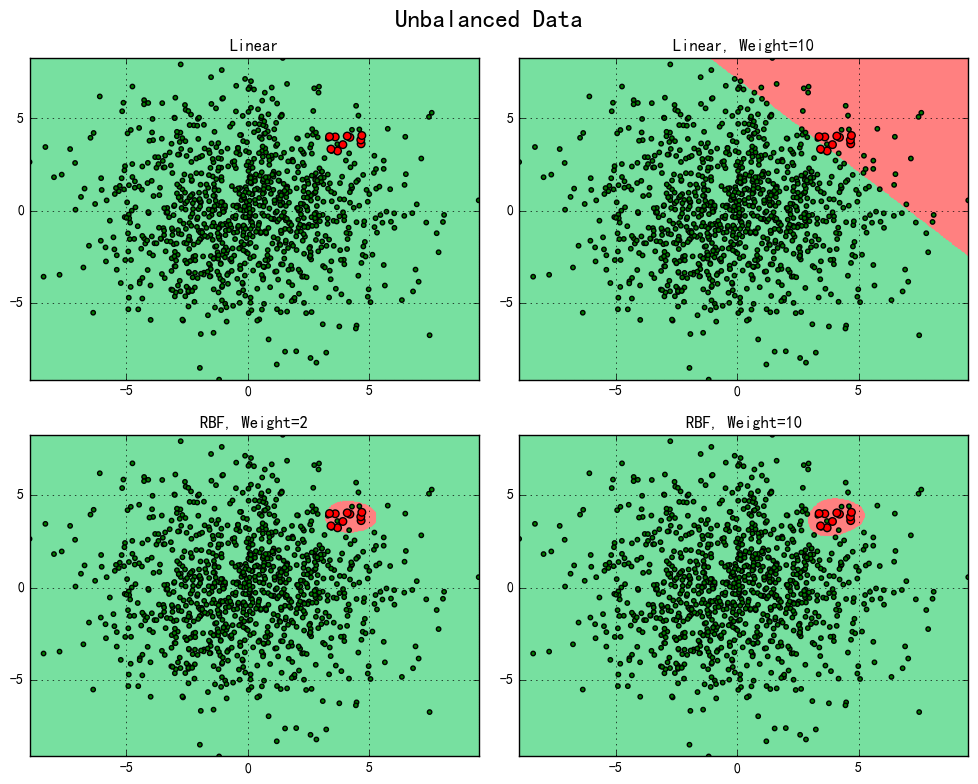

In [48]:
# classifier

# class_weight : Set the parameter C of class i to class_weight[i]*C for SVC.
clfs = [svm.SVC(C=1, kernel='linear'),
        svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 10}),
        svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
        svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]
titles = 'Linear', 'Linear, Weight=10', 'RBF, Weight=2', 'RBF, Weight=10'

x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j] 
grid_test = np.stack((x1.flat, x2.flat), axis=1)  

cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8), facecolor='w')
for i, clf in enumerate(clfs):
    clf.fit(x, y)

    y_hat = clf.predict(x)
    # show_accuracy(y_hat, y) 
    # show_recall(y, y_hat)  
    print (i+1, 'th model：')
    print ('Accuracy：\t', accuracy_score(y, y_hat))
    print (' Precision ：\t', precision_score(y, y_hat, pos_label=1))
    print ('Recall：\t', recall_score(y, y_hat, pos_label=1))
    print ('F1Score：\t', f1_score(y, y_hat, pos_label=1))
    print
    # plot
    plt.subplot(2, 2, i+1)
    grid_hat = clf.predict(grid_test)       # prediction
    grid_hat = grid_hat.reshape(x1.shape)  
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=s, cmap=cm_dark)      # 样本的显示
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(titles[i])
    plt.grid()
plt.suptitle(u'Unbalanced Data', fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()

### Hand Written Digits Recognization 

In [4]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from PIL import Image
import os


In [5]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print (tip + ' Accuracy：%.2f%%' % (100*np.mean(acc)))


def save_image(im, i):
    im *= 15.9375 # save 0-16 images
    im = 255 - im  # convert to conventional 0:black, 16:white
    a = im.astype(np.uint8)
    output_path = '/Users/Qianqian/Desktop/Python/notes/Data-and-Output'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    Image.fromarray(a).save(output_path + ('/%d.png' % i))

In [6]:
# read data
print ('Load Training File Start...')
data = np.loadtxt('Data-and-Output/14.optdigits.tra', dtype=np.float, delimiter=',')
x, y = np.split(data, (-1, ), axis=1) # -1, last col is y
images = x.reshape(-1, 8, 8) # 8 X 8 for each picture
y = y.ravel().astype(np.int)
print("x: \n", x)
print("y:\n", y)
print('images:\n', images)

Load Training File Start...
x: 
 [[  0.   1.   6. ...,   1.   0.   0.]
 [  0.   0.  10. ...,   3.   0.   0.]
 [  0.   0.   8. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   3. ...,   9.   0.   0.]
 [  0.   0.   6. ...,  16.   5.   0.]
 [  0.   0.   2. ...,   0.   0.   0.]]
y:
 [0 0 7 ..., 6 6 7]
images:
 [[[  0.   1.   6. ...,   1.   0.   0.]
  [  0.   7.  16. ...,  10.   0.   0.]
  [  0.   8.  16. ...,  11.   2.   0.]
  ..., 
  [  0.   4.  12. ...,  13.   5.   0.]
  [  0.   0.  14. ...,   9.   0.   0.]
  [  0.   0.   6. ...,   1.   0.   0.]]

 [[  0.   0.  10. ...,   0.   0.   0.]
  [  0.   7.  16. ...,   5.   0.   0.]
  [  0.  11.  16. ...,  14.   3.   0.]
  ..., 
  [  0.   7.  15. ...,  13.  11.   0.]
  [  0.   0.  16. ...,  15.   3.   0.]
  [  0.   0.  10. ...,   3.   0.   0.]]

 [[  0.   0.   8. ...,  13.   0.   0.]
  [  0.   1.  11. ...,  16.   1.   0.]
  [  0.   0.   0. ...,  14.   0.   0.]
  ..., 
  [  0.   2.  12. ...,   0.   0.   0.]
  [  0.   0.   2. ...,   0.   0.   0.]
  [  0. 

In [7]:
print ('Load Test Data Start...')
data = np.loadtxt('Data-and-Output/14.optdigits.tes', dtype=np.float, delimiter=',')
x_test, y_test = np.split(data, (-1, ), axis=1)
images_test = x_test.reshape(-1, 8, 8)
y_test = y_test.ravel().astype(np.int)
print ('Load Data OK...')
print('x_test:\n', x_test)
print('y_test:\n', y_test)
# x, x_test, y, y_test = train_test_split(x, y, random_state=1)
# images = x.reshape(-1, 8, 8)
# images_test = x_test.reshape(-1, 8, 8)

Load Test Data Start...
Load Data OK...
x_test:
 [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
y_test:
 [0 1 2 ..., 8 9 8]


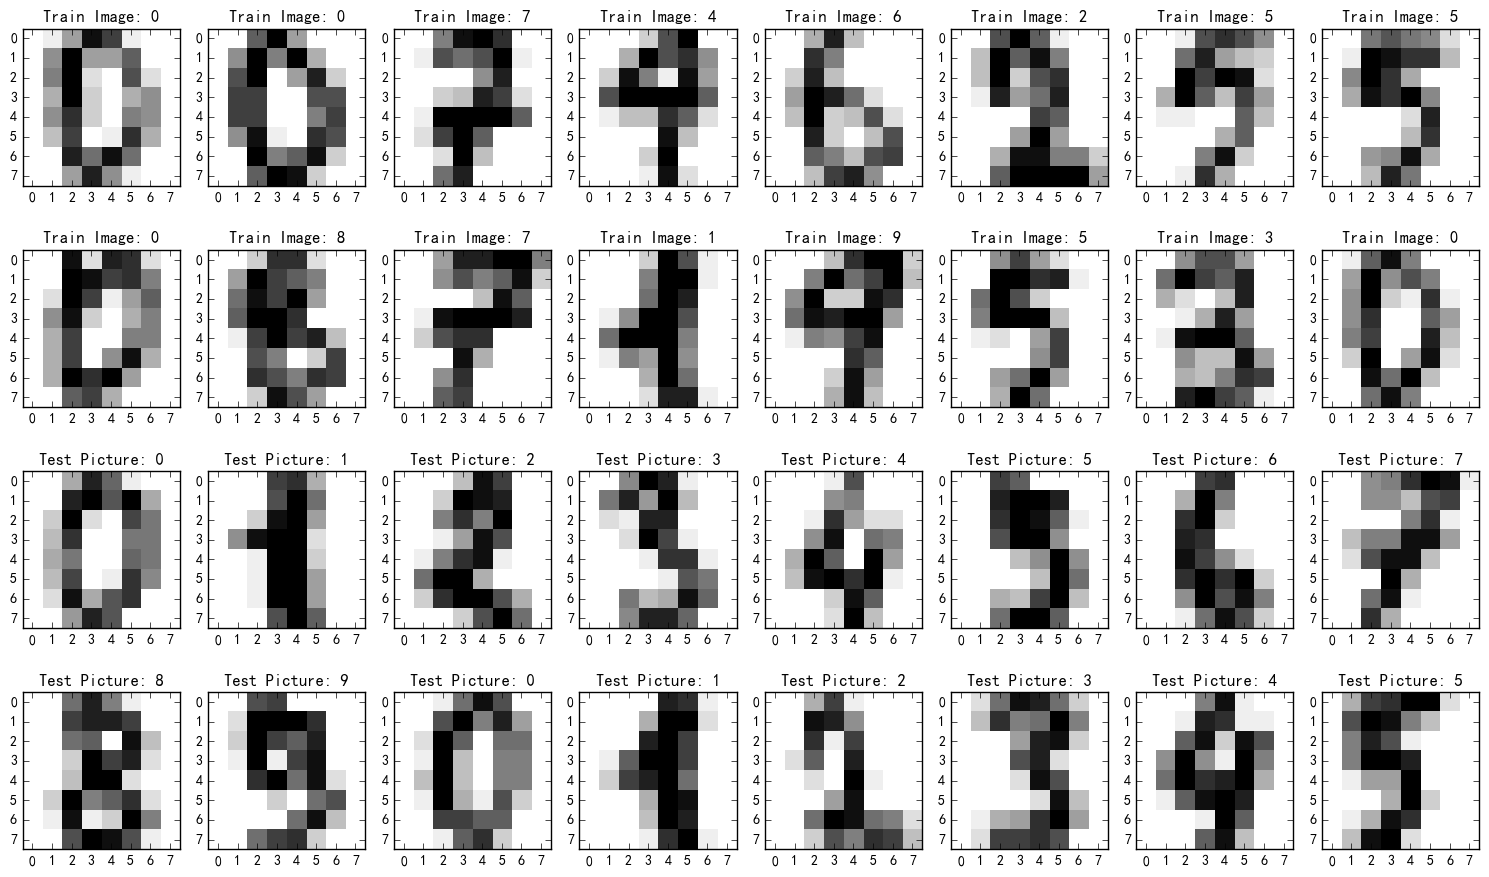

Start Learning...
Learning is OK...
Train Set Accuracy：99.82%
[0 1 2 ..., 8 9 8]
[0 1 2 ..., 8 9 8]
Test Set Accuracy：98.27%
Error y hat: 
 [9 1 1 1 9 5 9 9 9 9 9 8 9 8 1 9 9 1 3 8 9 9 9 9 1 4 8 3 5 5 1]
True y:
 [5 2 2 2 7 7 5 7 7 7 7 6 7 3 8 8 8 8 9 9 3 8 8 8 8 0 4 9 9 3 8]


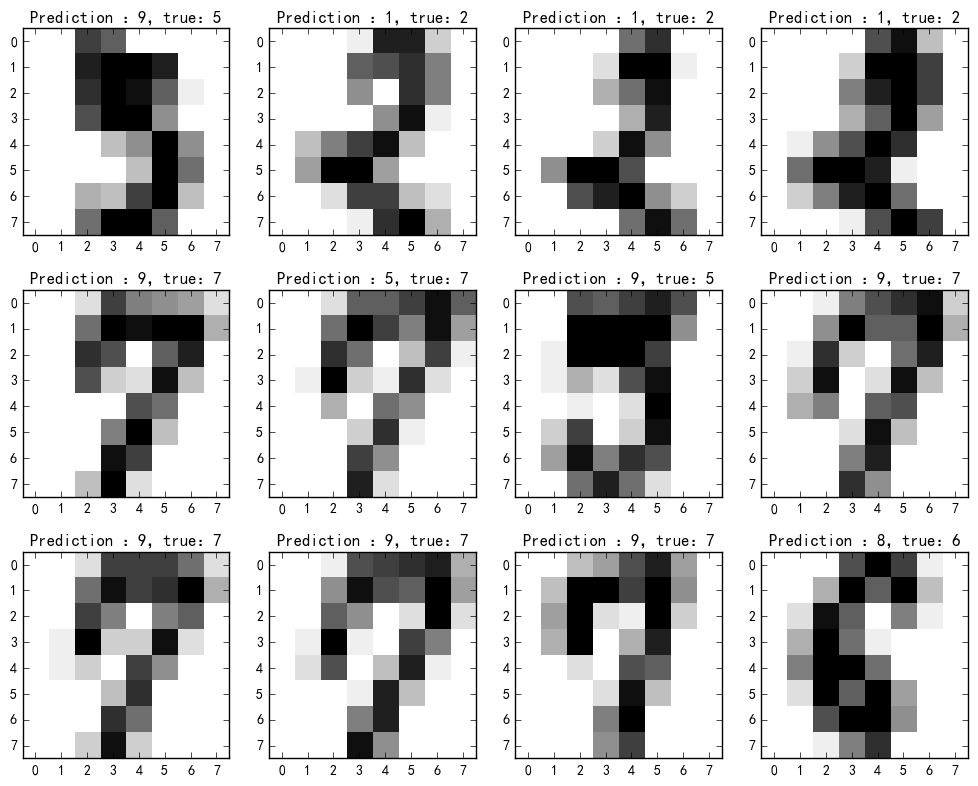

In [8]:

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 9), facecolor='w')
for index, image in enumerate(images[:16]):
    # print(index, 'th image: \n',image)
    plt.subplot(4, 8, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # gray reverse as 0 represents all white in orig data
    plt.title(u'Train Image: %i' % y[index])
for index, image in enumerate(images_test[:16]):
    plt.subplot(4, 8, index + 17)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    save_image(image.copy(), index) # save umage
    plt.title(u'Test Picture: %i' % y_test[index])

plt.tight_layout()
plt.show()

clf = svm.SVC(C=1, kernel='rbf', gamma=0.001)   # ~ kNN
print ('Start Learning...')
clf.fit(x, y)
print ('Learning is OK...')
y_hat = clf.predict(x)
show_accuracy(y, y_hat, 'Train Set')
y_hat = clf.predict(x_test)
print (y_hat)
print (y_test)
show_accuracy(y_test, y_hat, 'Test Set')

# images which are classified incorrectly
err_images = images_test[y_test != y_hat]
err_y_hat = y_hat[y_test != y_hat]
err_y = y_test[y_test != y_hat]
print ('Error y hat: \n', err_y_hat)
print ('True y:\n',err_y)
plt.figure(figsize=(10, 8), facecolor='w')
for index, image in enumerate(err_images):
    if index >= 12:
        break
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'Prediction ：%i，true：%i' % (err_y_hat[index], err_y[index]))
plt.tight_layout()
plt.show()



### Support Vector Regression

In [9]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [15]:
# simulate data 
N = 50
np.random.seed(0)
x = np.sort(np.random.uniform(0, 6, N), axis=0)
y = 2*np.sin(x) + 0.1*np.random.randn(N)
x = x.reshape(-1, 1)
print ('x =\n', x[:10])
print ('y =\n', y)

x =
 [[ 0.1127388 ]
 [ 0.12131038]
 [ 0.36135283]
 [ 0.42621635]
 [ 0.5227758 ]
 [ 0.70964656]
 [ 0.77355779]
 [ 0.86011972]
 [ 1.26229537]
 [ 1.58733367]]
y =
 [ 0.05437325  0.43710367  0.65611482  0.78304981  0.87329469  1.38088042
  1.23598022  1.49456731  1.81603293  2.03841677  1.84627139  1.54797796
  1.63479377  1.53337832  1.22278185  1.15897721  0.92928812  0.95065638
  0.72022281  0.69233817 -0.06030957 -0.23617129 -0.23697659 -0.34160192
 -0.69007014 -0.48527812 -1.00538468 -1.00756566 -0.98948253 -1.05661601
 -1.17133143 -1.46283398 -1.47415531 -1.61280243 -1.7131299  -1.78692494
 -1.85631003 -1.98989791 -2.11462751 -1.90906396 -1.95199287 -2.14681169
 -1.77143442 -1.55815674 -1.48840245 -1.35114367 -1.27027958 -1.04875251
 -1.00128962 -0.67767925]


In [16]:
# fit 
print ('SVR - RBF')
svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
svr_rbf.fit(x, y)
print ('SVR - Linear')
svr_linear = svm.SVR(kernel='linear', C=100)
svr_linear.fit(x, y)
print ('SVR - Polynomial')
svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
svr_poly.fit(x, y)
print ('Fit OK.')

# test data
x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(x_test)
y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)



SVR - RBF
SVR - Linear
SVR - Polynomial
Fit OK.


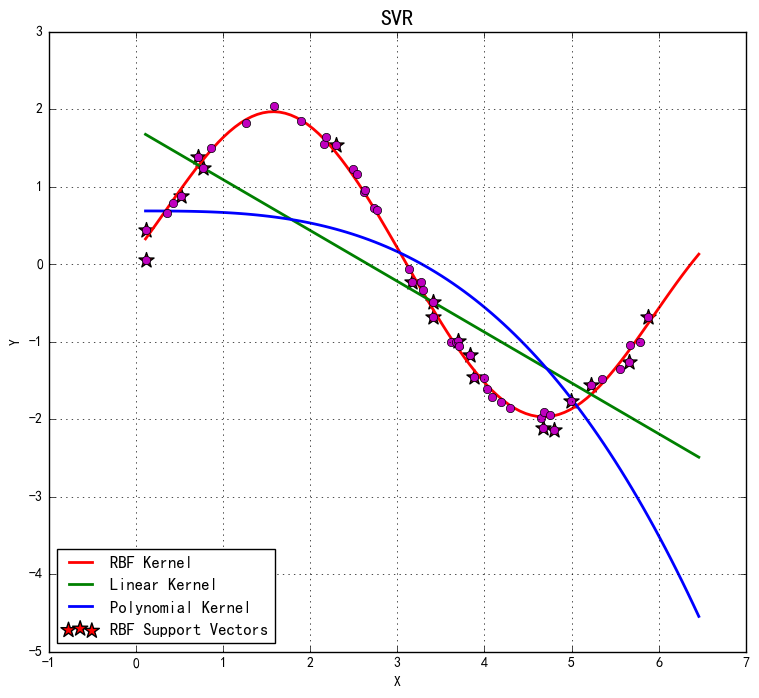

In [17]:
# plot    
plt.figure(figsize=(9, 8), facecolor='w')
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=130, c='r', marker='*', label='RBF Support Vectors')
plt.legend(loc='lower left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


### SVR with Cross Validation

In [18]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV    # 0.17 grid_search
import matplotlib.pyplot as plt

In [ ]:
# simulate data 
N = 50
np.random.seed(0)
x = np.sort(np.random.uniform(0, 6, N), axis=0)
y = 2*np.sin(x) + 0.1*np.random.randn(N)
x = x.reshape(-1, 1)
print ('x =\n', x[:10])
print ('y =\n', y)

In [20]:
model = svm.SVR(kernel='rbf')
c_can = np.logspace(-2, 2, 10)
gamma_can = np.logspace(-2, 2, 10)
svr = GridSearchCV(model, param_grid={'C': c_can, 'gamma': gamma_can}, cv=5)
svr.fit(x, y)
print ('Best Parameters：\n', svr.best_params_)

Best Parameters：
 {'gamma': 0.59948425031894093, 'C': 35.938136638046259}


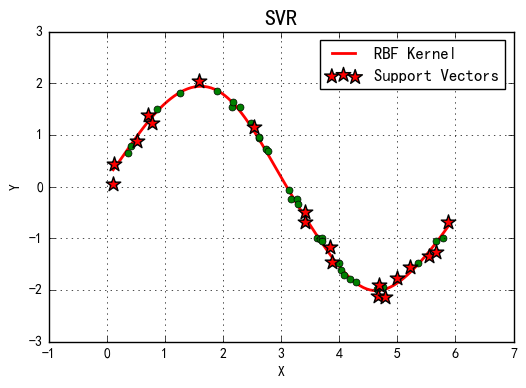

In [21]:
# plot
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_hat = svr.predict(x_test)

sp = svr.best_estimator_.support_
plt.figure(facecolor='w')
plt.scatter(x[sp], y[sp], s=120, c='r', marker='*', label='Support Vectors', zorder=3)
plt.plot(x_test, y_hat, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x, y, 'go', markersize=5)
plt.legend(loc='upper right')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
